# Module 4: Forecast Uncertainty & Model Evaluation

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# omd
import datetime
import importlib
import sys

sys.path.append('../../My-Code/')

import timetools as tt

importlib.reload(tt)

print('timetools version: {}'.format(tt.__version__))
print('statsmodels version: {}'.format(sm.__version__))

timetools version: 01.15.2022
statsmodels version: 0.13.1


### Sources of Uncertainty  

<img src='./figures/sources of uncertainty.png'></img>  

Dmitry Plotnikov: Welcome to the second part of Session 2,
Module 4 of the Macroeconomic Forecasting course.
So in this lecture, we're going to continue
talking about sources of uncertainty.
So remember in the first lecture, we assumed
that we know exactly what the conditional mean is,
the functional form.
And I showed you that even if we know this exactly,
there's still going to be uncertainty associated with our forecast.
Now, let's assume that our conditional mean, which
is this expression over here, if you remember,
depends on some set of variables X and parameters theta.
And for now, let's assume that we know exactly what parameters theta are.
You see that in order to forecast what our variable y_t+1
is going to be tomorrow, we have to know what variables X_t+1
will be tomorrow.
And these variables might either be jointly determined
within the same system or economic model-- you can think of a DSGE model--
or can be determined outside of the system and be exogenous.
So for example, if we want to forecast GDP for Thailand,
some of the variables of X_t+1 can include inflation
in Thailand, which will be determined within the same economic model
for Thailand,
and some of X_t might include, for example, world GDP, which you probably
would borrow from World Economic Outlook Database of the IMF.
Also, some of the X_t might not be random.
For example, some dummy variables for some periods that happened in the past.
So those ones will be very easy to extend into the t+1 period.
But generally speaking, if our forecasting model
looks the following way, then the right-hand side of explanatory variables--
so variables X_t-- generally speaking will
have to be forecast using additional equations.
And you see that X_t+1, for example, can
have its own conditional mean specification
and depend on its own variables Z_t+1 and
it actually can include y_t+1 and parameters beta and its own error
term, which brings us to the second source of forecast uncertainty,
which is inherent randomness of the explanatory variable.
And because there is uncertainty associated with forecasting X_t+1
into the future, this will result in forecast uncertainty for y_t+1
into the future.
OK, so what if the parameters of the data generating process
are known-- or conditional mean to be more precise?
We will continue that we know the exact functional form, but what we don't know
is what these parameters, the theta is.
So we know the functional form, but we don't know the parameters.
And what happens in this case?
We have to estimate it, right?
And we estimate it using available data, which is itself random.
And because of that, estimates of theta will be random as well.
And generally speaking, estimates of theta
will not be exactly the same as the true parameter theta.
Because of the randomness associated with estimates of theta,
it will work as another source of forecast uncertainty
for our variable of interest.
Generally speaking, there are even more sources of forecast uncertainty.
For example, the general mean can be misspecified.
What it means?
It means that you can get the functional form wrong.
You might miss one of the key variable that should be included,
but for example, you forget to include it.
So for example, if you're forecasting inflation in Thailand,
then you might forget to include oil prices that
might affect the inflation in Thailand.
For example, you can assume that the functional form is linear,
but in fact, it might not be linear.
So if you miss some of the non-linear terms, it will result in poor forecasts.
Another issue is that the underlying parameter
can change over time, which means that there can
be a structural break in the system.
And if you don't take that into account, then your forecast
might be affected as well.
Another issue is, what if you use
a wrong method to estimate parameters?
So that means that if the estimate of the parameter is going to be wrong,
your estimated parameter will be very far away from the true one,
and this will result, again, in a poor forecast.
Also, there might be a measurement error in explanatory variables.
For example, if statistics in your country of interest
are collected not in the best way, this will also
increase the forecast uncertainty since the X_t will not be measured correctly.
OK, so what we learned in this lecture?
First we learned all the sources of forecast uncertainty.
So here, I'm summarizing both the previous lecture and this one.
You see that first of all, because economic variables are inherently random,
there is this error term that will affect our forecast
that will explain the difference between the actual outcome y_t+1
and what we estimate in our forecast, which
is represented by this term over here.
Because of the unknown parameters in the conditional mean, theta,
our forecast will be uncertain because we
need to forecast additional explanatory variables.
They can be random, and there will be uncertainty associated with those.
This will affect our forecast.
And finally, if we misspecify functional form--
so the function F itself, it will also affect our forecast.
OK, so this is the end of session 2.
I will see you for session 3.

### Forecast Assessment  
<img src='./figures/measures of forecast accuracy.png'></img>  


Dmitry Plotnikov: Welcome to Lecture 3, Module 4 of the Macroeconomic Forecasting course.
In this lecture, we're going to talk about forecast assessment statistics.
And specifically, how can we measure forecast uncertainty?
How can we assign one number to evaluate our forecast performance?
And in the workshop, we're going to talk about how we do it in practice.
So unfortunately, you already know that there
are different dimensions to forecast performance,
and it's impossible to assign a unique measure.
So, often you need to look at different dimensions,
and that's why there are different statistics that correspond
to these different dimensions.
So first, what are the common statistical measures?
Usually, the smaller they are, the better the forecast.
So the bias measures the difference between the forecast
and the correct outcome, on average.
So what it means, it means that if your actual outcome is here, for example,
that's inflation of, say, 3%,
and, generally speaking, your forecasts are somewhere here,
it means that the bias is
going to be this approximate distance over here.
Second is the variance, which is how narrow your forecasts are.
For example, again, if you are forecasting inflation,
this is your target inflation of 3%.
And these are your forecasts, variance or standard forecast error
will measure how spread your forecasts are from each other in this case.
And finally, the most commonly used measure of forecast performance
is mean squared forecast error, which serves as a combination of the two,
and measures how we can combine these two numbers into one.
So let me introduce these concepts one by one and using numerical formulas.
So if we define forecast error as the difference
between our forecast and the actual value,
then the bias is just the average of those forecast errors.
Standard error or standard forecast error
is defined according to this formula.
And you can think of it as a standard deviation for forecast errors.
Mean squared error is just an average of squared forecast errors,
and the root mean square error the root of this measure.
Mean absolute error and mean absolute percentage error
define to this formula.
So you see that you take the average of absolute forecast errors
or absolute value of forecast errors relative to the actual observations.  

So what are the **advantages and disadvantages** of these formulas?
So for example, the most commonly used measure
is `root mean (squared) forecast error`, probably.
But sometimes, it makes sense to use `mean absolute error`.
And when does it make sense?  
* In fact, **root mean squared error** is known to be very sensitive to outliers,
and that's because you square each of the forecast errors.  
* So if you don't mind large outliers very rarely,
you can compare your forecast using **mean absolute error**.  

We'll see how it works in practice.
So what's the relationship between different measures?
It can be shown that bias, standard forecast error, and mean squared error
are related according to this formula.
And you can look at the appendix to see the proof if you're interested.
But what it means, it means that when you look at the mean squared error,
you essentially combine the standard forecast
error and bias into one single measure in accordance to this formula.  

MSE = SE<sup>2</sup> + BIAS<sup>2</sup>  

It's also important to know that forecast performances can
be very different depending on how far in the future you forecast your model.
So for example, in the first graph over here,
you see that when you forecast one month ahead, generally speaking,
your bias is very small, because as you can see from this graph,
all of the density of your forecast errors are all concentrated around 0.
And also the spread around 0 is very small, which means that the standard forecast
error is very small, as well.
However, when you forecast 24 months in advance,
you can already see that there is probably
some small bias, potentially positive or negative-- it's hard to say here.
But I think it's positive in this case.
And the spread of forecast error is very large.
You see that sometimes you get very far away from the actual outcome.
And it's important to evaluate forecast performance for different horizons
separately.
We'll talk about this later.
Also all these measures assume symmetric costs.
What it means, it means that positive and negative forecast error
are assumed to be valued in the same way for the forecast error.
However it doesn't have to be the case.
For example, airplane departure-- what does it mean?
It means that if you arrive 20 minutes after the plane departure,
it's very different cost if you arrive 10 minutes before the plane departure,
right?
Same with inflation forecasts, when the monetary regime
is inflation targeting, for example.
After you calculate these numbers, the forecast evaluation
statistics for your model, you will want to compare these numbers
to a forecast of a different model.
So what model can you use?  

The most obvious model that people use is called **naive forecast**,
which is just a **random walk model**.
It's the most simple model, and does not require
estimation of any parameters, which in general can affect your forecast
accuracy.
The advantage of using economic models, even
if it performs poorly relative to, say, a given benchmark model,
is that it often provides you a reason for forecast error
because it includes some economic relations that
are easily interpretable.
So what is the naive forecasting model?
Assuming one step ahead forecast, it's just
forecast for next period is a value of the last period.  

**random walk:** $\hat{y}$<sub>t</sub> = ${y}$<sub>t-1</sub>

And because of that, it's very easy to calculate, say, mean absolute percentage
share for this naive forecast.
You just need to substitute everywhere, instead of a y_t hat y_t- 1.
And you can calculate this number.
After you calculate this number, you can compare this number
to mean absolute percentage error for your model.
Whichever is smaller means that that it produces small, better forecasts.
And note that this formula, generally speaking,
**you cannot compute if y_t is 0 or y_t is already in percents**,
because it doesn't make sense to take percents of percents.
So if you're dealing with inflation or GDP growth,
say, it doesn't make sense to look at percentage error.  

Also, remember to always back out your analysis
when you use forecast statistics with **graphical performance** of your forecast.
So remember to plot your forecast against the actual data
and look at where the forecasts errors are, and try to interpret them.  

<img src='./figures/measures of forecast accuracy2.png'></img>

So what we learned in this lecture is that I showed you
statistics for evaluating a forecast model.
We talked about the advantages and disadvantages of some of them.
And I mentioned a proper benchmark for forecast evaluation,
the so-called naive forecasting model, which
for each it's very easy to calculate
all the statistics.
And also remember to always support your numerical analysis
with visual cues of actual outcomes against their forecasts.
This way, it will help you see where the errors are
and where they're coming from.
All right, so this was the Lecture 3 of Module 4.
I'll see you for the next one.


---
### Lets evaluate some forecastas!  
### By hand!

In [2]:
df = pd.read_csv('./data/M4_Thailand_Inflation.csv', parse_dates=[0], infer_datetime_format=True)
df.set_index('date', inplace=True)

In [3]:
df

,actual,f1,f2
date,,,
2013-12-01,1.66,NaN,NaN
2014-01-01,1.93,1.84,1.66
2014-02-01,1.95,1.92,1.93
2014-03-01,2.12,1.96,1.95
2014-04-01,2.48,2.31,2.12
2014-05-01,2.62,3.61,2.48
2014-06-01,2.35,2.45,2.62
2014-07-01,2.16,2.01,2.35
2014-08-01,2.12,1.99,2.16


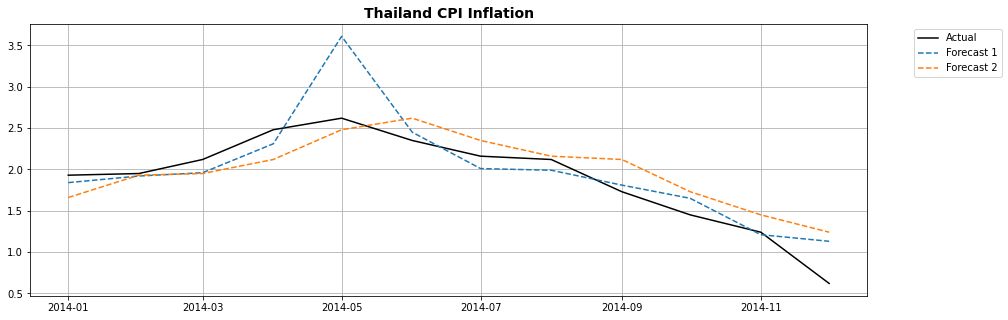

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df['actual'][1:], label='Actual', color='black')
ax.plot(df['f1'], label='Forecast 1', ls='dashed')
ax.plot(df['f2'], label='Forecast 2', ls='dashed')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Thailand CPI Inflation', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

In [5]:
# error metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def error_metrics(y_true, y_pred):
    bias = np.mean(y_pred - y_true)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    stfe = rmse-bias**2
    mae = mean_absolute_error(y_true, y_pred)
    mpe = np.mean((y_pred - y_true) / y_true)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    results = pd.DataFrame(bias, index=['Bias'], columns=['Value'])
    results = pd.concat([results, pd.DataFrame(mse, index=['MSE'], columns=['Value'])], axis=0)
    results = pd.concat([results, pd.DataFrame(rmse, index=['RMSE'], columns=['Value'])], axis=0)
    results = pd.concat([results, pd.DataFrame(stfe, index=['St FE'], columns=['Value'])], axis=0)
    results = pd.concat([results, pd.DataFrame(mae, index=['MAE'], columns=['Value'])], axis=0)
    results = pd.concat([results, pd.DataFrame(mpe, index=['MPE'], columns=['Value'])], axis=0)
    results = pd.concat([results, pd.DataFrame(mape, index=['MAPE'], columns=['Value'])], axis=0)
    
    return results

In [6]:
error_metrics(df['actual'][1:], df['f1'][1:])

,Value
Bias,0.093333
MSE,0.116700
RMSE,0.341614
St FE,0.332903
MAE,0.220000
MPE,0.088848
MAPE,0.149014


In [7]:
# calculate error metrics 
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def error_metrics(y_true, y_pred: pd.DataFrame):

    n_models = y_pred.shape[1]
    results = pd.DataFrame()
    y_true_theilu2 = y_true.shift(1)[1:]
    y_true = y_true[1:]

    for i in np.arange(0, n_models):
        pred = y_pred[y_pred.columns[i]]
        bias = np.mean(y_true - pred)
        mse = mean_squared_error(y_true, pred)
        rmse = mean_squared_error(y_true, pred, squared=False)
        stfe = rmse - np.square(bias)
        mae = mean_absolute_error(y_true, pred)
        mpe = np.mean((y_true - pred) / y_true)
        mape = mean_absolute_percentage_error(y_true, pred)
        tu1 = rmse / (np.sqrt(np.mean(np.square(y_true))) + np.sqrt(np.mean(np.square(y_pred[y_pred.columns[i]]))))
        x = np.mean(np.square(np.abs(y_true - pred) / y_true_theilu2))
        y = np.mean(np.square((y_true - y_true_theilu2) / y_true_theilu2))
        tu2 = np.sqrt(x/y)
        bias_prop = np.square(bias)/ mse
        std_actual = np.std(y_true)
        std_pred = np.std(y_pred[y_pred.columns[i]])
        var_prop = np.square(std_actual-std_pred) / mse 
        covar_prop = 1 - bias_prop - var_prop
      
        col_name = y_pred[y_pred.columns[i]].name

        if i == 0:
            results = pd.DataFrame(bias, index=['Bias'], columns=[col_name])
            results = pd.concat([results, pd.DataFrame(mse, index=['MSE'], columns=[col_name])], axis=0)
            results = pd.concat([results, pd.DataFrame(rmse, index=['RMSE'], columns=[col_name])], axis=0)
            results = pd.concat([results, pd.DataFrame(stfe, index=['Std FE'], columns=[col_name])], axis=0)
            results = pd.concat([results, pd.DataFrame(mae, index=['MAE'], columns=[col_name])], axis=0)
            results = pd.concat([results, pd.DataFrame(mpe, index=['MPE'], columns=[col_name])], axis=0)
            results = pd.concat([results, pd.DataFrame(mape, index=['MAPE'], columns=[col_name])], axis=0)
            results = pd.concat([results, pd.DataFrame(tu1, index=["Theil's U1"], columns=[col_name])], axis=0)
            results = pd.concat([results, pd.DataFrame(tu2, index=["Theil's U2"], columns=[col_name])], axis=0)
            results = pd.concat([results, pd.DataFrame(bias_prop, index=["Bias Proportion"], columns=[col_name])], axis=0)
            results = pd.concat([results, pd.DataFrame(var_prop, index=["Variance Proportion"], columns=[col_name])], axis=0)
            results = pd.concat([results, pd.DataFrame(covar_prop, index=["Covariance Proportion"], columns=[col_name])], axis=0)
        else:
            results[col_name] = [bias, mse, rmse, stfe, mae, mpe, mape, tu1, tu2, bias_prop, var_prop, covar_prop]
    
    return results

In [8]:
display(tt.error_metrics(df['actual'], pd.DataFrame(df['f1'])[1:]))
tt.error_metrics(df['actual'], df[['f1', 'f2']][1:])

,f1
Bias,-0.093333
MSE,0.116700
RMSE,0.341614
Std FE,0.332903
MAE,0.220000
MPE,-0.088848
MAPE,0.149014
Theil's U1,0.084232
Theil's U2,0.943587
Bias Proportion,0.074645


,f1,f2
Bias,-0.093333,-0.086667
MSE,0.116700,0.085083
RMSE,0.341614,0.291690
Std FE,0.332903,0.284179
MAE,0.220000,0.246667
MPE,-0.088848,-0.115057
MAPE,0.149014,0.186546
Theil's U1,0.084232,0.072987
Theil's U2,0.943587,1.000000
Bias Proportion,0.074645,0.088279


## Session 3 Workshop Questions: Forecasting Inflation in Thailand Questions 

In [9]:
thailand = pd.read_csv('./data/Thailand_Inflation.csv', parse_dates=[0])
thailand.set_index('date', inplace=True)
thailand

,inflation_yoy_pct
date,
2003-01-01,2.36
2003-02-01,2.13
2003-03-01,1.82
2003-04-01,1.50
2003-05-01,1.83
...,...
2014-08-01,2.12
2014-09-01,1.73
2014-10-01,1.45


In [10]:
tt.adf(thailand)

Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Differenced?  d=0

Test Statistic                  -4.063269
p-value                          0.001113
#Lags Used                       4.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64

The time series is stationary.


In [11]:
tt.KPSS(thailand, regression='c')

If the test statistic is greater than the critical value,
(given in the table below for alpha levels of 10%, 5%, 2.5% and 1%)
then the null hypothesis is rejected; the series is non-stationary.

Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

Differenced?  d=0

Test Statistic            0.111979
p-value                   0.100000
#Lags Used               10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64




Differenced?  d=0



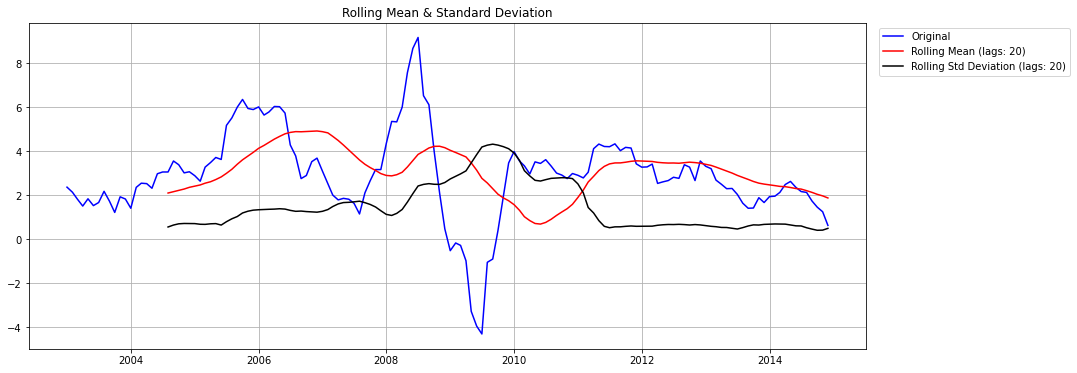

In [12]:
tt.plot_for_stationary(thailand)

In [13]:
thailand.loc['2003-01-01':'2013-12-01']

,inflation_yoy_pct
date,
2003-01-01,2.36
2003-02-01,2.13
2003-03-01,1.82
2003-04-01,1.50
2003-05-01,1.83
...,...
2013-08-01,1.63
2013-09-01,1.40
2013-10-01,1.41


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      inflation_yoy_pct   No. Observations:                  132
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -144.522
Date:                Sun, 20 Feb 2022   AIC                            295.045
Time:                        16:47:35   BIC                            303.693
Sample:                    01-01-2003   HQIC                           298.559
                         - 12-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8315      0.893      3.170      0.002       1.081       4.582
ar.L1          0.9300      0.017     53.930      0.000       0.896       0.964
sigma2         0.5151      0.043     11.959      0.000       0.431       0.600
===================================================================================
Ljung-Box (L1) (Q):                  17.82   Jarque-Bera (JB):                46.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.10
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Minimum p-value: 0.00 < 0.05
The residuals are correlated.  Not good.


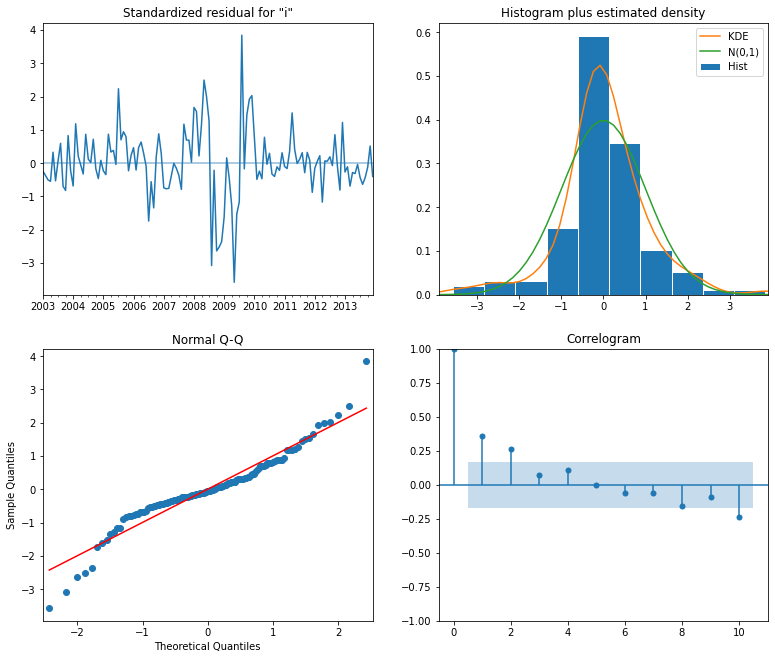

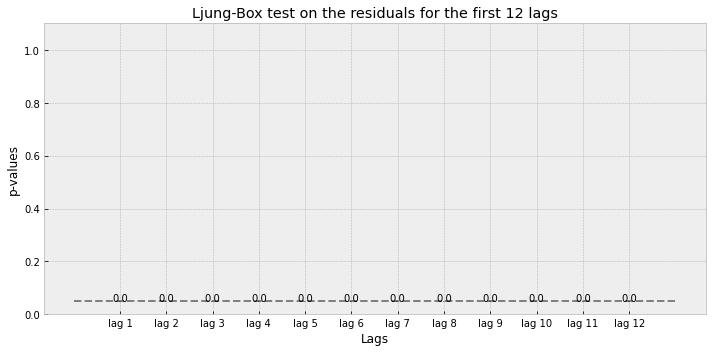

In [14]:
ar1__model = sm.tsa.ARIMA(thailand.loc['2003-01-01':'2013-12-01'], order=(1,0,0))
ar1_model_fit = ar1__model.fit()
display(ar1_model_fit.summary())
ar1_model_fit.plot_diagnostics(figsize=(13,11))
ar1_model_residuals = ar1_model_fit.resid
tt.ljungbox(np.array(ar1_model_residuals), lags=12)

#### Dynamic forecast for 2014

In [15]:
thailand.tail(12)

,inflation_yoy_pct
date,
2014-01-01,1.93
2014-02-01,1.95
2014-03-01,2.12
2014-04-01,2.48
2014-05-01,2.62
2014-06-01,2.35
2014-07-01,2.16
2014-08-01,2.12
2014-09-01,1.73


In [16]:
ar_post = ar1_model_fit
predictions = []

for i in range(12):
    prediction = ar_post.forecast(1)
    predictions.append(list(prediction))
    ar_post = ar_post.append(prediction)    

In [17]:
ar_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      inflation_yoy_pct   No. Observations:                  144
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -151.570
Date:                Sun, 20 Feb 2022   AIC                            309.139
Time:                        16:47:49   BIC                            318.049
Sample:                    01-01-2003   HQIC                           312.759
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8315      0.893      3.170      0.002       1.081       4.582
ar.L1          0.9300      0.017     53.930      0.000       0.896       0.964
sigma2         0.5151      0.043     11.959      0.000       0.431       0.600
===================================================================================
Ljung-Box (L1) (Q):                  19.41   Jarque-Bera (JB):                70.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.42
===================================================================================

Warnings:
[1] Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
predictions = [i[0] for i in predictions]

In [19]:
thai = thailand.loc['2014-01-01':'2014-12-01']
thai['prediction'] = np.round(predictions, 2)
thai['prediction_copied'] = [1.74, 1.82, 1.89, 1.95, 2.02, 2.07, 2.13, 2.18, 2.23, 2.27, 2.31, 2.35]     # copied from spreadsheet
thai['naive'] = 1.66
thai

,inflation_yoy_pct,prediction,prediction_copied,naive
date,,,,
2014-01-01,1.93,1.74,1.74,1.66
2014-02-01,1.95,1.82,1.82,1.66
2014-03-01,2.12,1.89,1.89,1.66
2014-04-01,2.48,1.96,1.95,1.66
2014-05-01,2.62,2.02,2.02,1.66
2014-06-01,2.35,2.07,2.07,1.66
2014-07-01,2.16,2.13,2.13,1.66
2014-08-01,2.12,2.18,2.18,1.66
2014-09-01,1.73,2.22,2.23,1.66


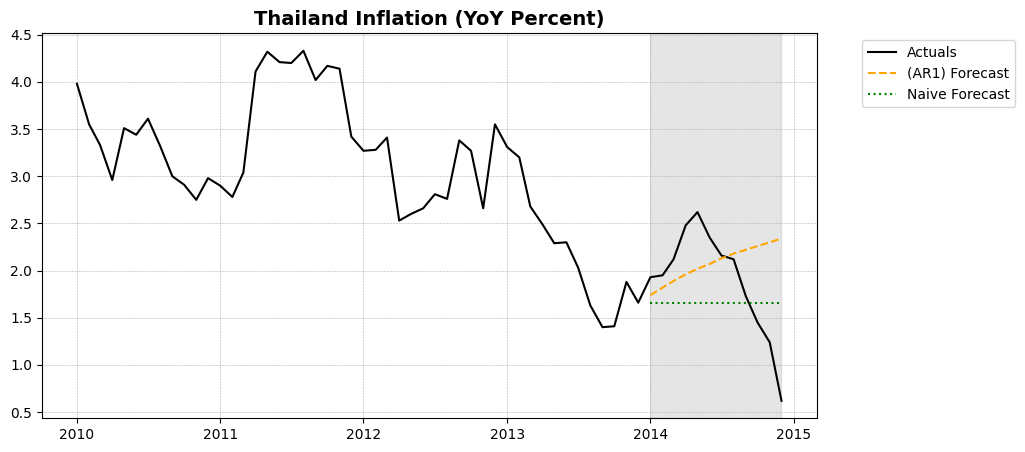

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(thailand.loc['2010':]['inflation_yoy_pct'], color='black', label='Actuals')
ax.plot(thai['prediction'], color='orange', label='(AR1) Forecast', ls='dashed')
ax.plot(thai['naive'], color='green', label='Naive Forecast', ls='dotted')
ax.axvspan(xmin='2014-01-01', xmax='2014-12-01', color='#808080', alpha=0.2)
ax.set_title('Thailand Inflation (YoY Percent)', size=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, ls='--', lw=0.4)
plt.show()

### Error Metrics

In [21]:
np.sqrt(0.24114096817221786 / 0.03455815416506298)

2.6415584893779385

In [22]:
error_metrics(thailand.loc['2013-12-01':'2014-12-01']['inflation_yoy_pct'], thai[['prediction', 'prediction_copied', 'naive']])

,prediction,prediction_copied,naive
Bias,-0.180000,-0.182500,2.375000e-01
MSE,0.483117,0.490825,3.506083e-01
RMSE,0.695066,0.700589,5.921219e-01
Std FE,0.662666,0.667283,5.357156e-01
MAE,0.510000,0.514167,5.158333e-01
MPE,-0.304489,-0.307225,-1.464681e-02
MAPE,0.445376,0.448785,3.455126e-01
Theil's U1,0.171225,0.172464,1.629618e-01
Theil's U2,2.641558,2.660910,1.815773e+00
Bias Proportion,0.067065,0.067858,1.608811e-01


### Create best ARIMA model

Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Differenced?  d=0

Test Statistic                  -5.628352
p-value                          0.000001
#Lags Used                       1.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64

The time series is stationary.
Differenced?  d=0



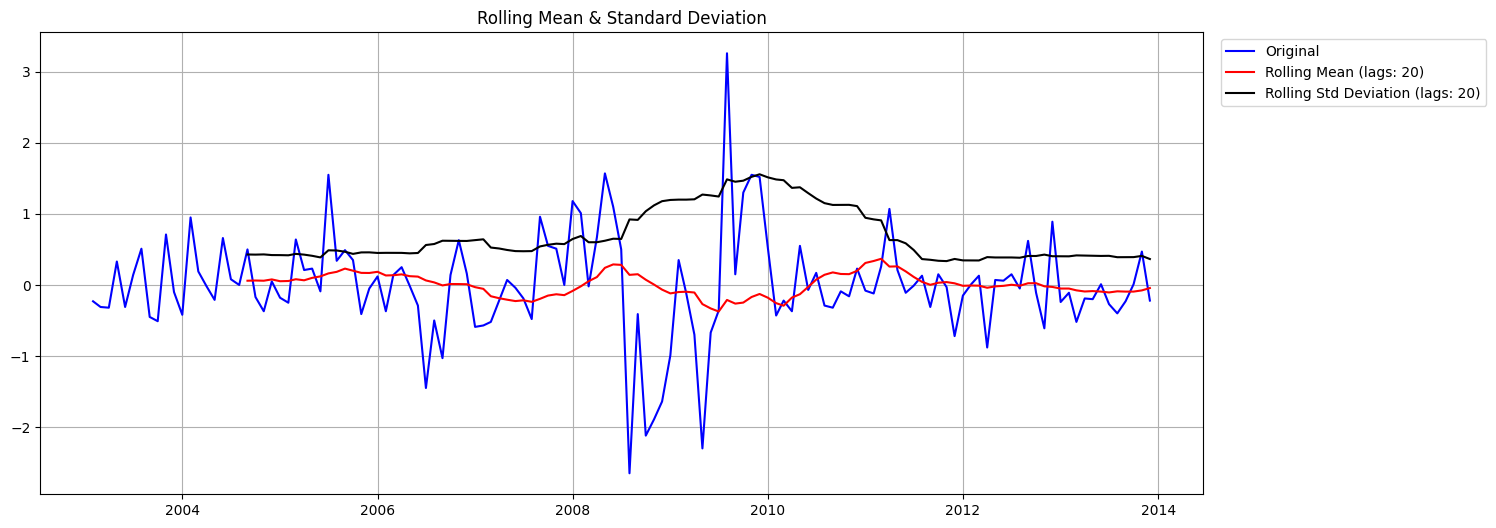

In [23]:
tt.adf(thailand.loc['2003-01-01':'2013-12-01']['inflation_yoy_pct'].diff(1)[1:])
tt.plot_for_stationary(thailand.loc['2003-01-01':'2013-12-01']['inflation_yoy_pct'].diff(1)[1:])

In [24]:
tt.KPSS(thailand.loc['2003-01-01':'2013-12-01']['inflation_yoy_pct'].diff(1)[1:])

If the test statistic is greater than the critical value,
(given in the table below for alpha levels of 10%, 5%, 2.5% and 1%)
then the null hypothesis is rejected; the series is non-stationary.

Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

Differenced?  d=0

Test Statistic            0.037916
p-value                   0.100000
#Lags Used               10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64




In [25]:
endog = pd.Series(np.log(thailand.loc['2003-01-01':'2013-12-01']['inflation_yoy_pct']).diff(1)[1:].values)

ps = range(0, 12, 1)
qs = range(0, 12, 1)

order_list = list(product(ps, qs))

tt.optimize_ARMA(endog=endog, order_list=order_list)


  0%|          | 0/144 [00:00<?, ?it/s]

,"(p,q)",AIC
0,"(3, 11)",11.977685
1,"(5, 3)",13.706414
2,"(1, 11)",13.887798
3,"(4, 11)",15.246482
4,"(5, 4)",15.315732
...,...,...
139,"(0, 9)",30.387502
140,"(8, 11)",31.286595
141,"(3, 7)",31.545551
142,"(10, 10)",33.490178


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      inflation_yoy_pct   No. Observations:                  132
Model:                 ARIMA(5, 1, 3)   Log Likelihood                   2.894
Date:                Sun, 20 Feb 2022   AIC                             12.212
Time:                        16:48:21   BIC                             38.089
Sample:                    01-01-2003   HQIC                            22.727
                         - 12-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5793      0.175      3.308      0.001       0.236       0.922
ar.L2          0.0305      0.253      0.120      0.904      -0.466       0.527
ar.L3          0.7793      0.213      3.658      0.000       0.362       1.197
ar.L4         -0.2592      0.146     -1.778      0.075      -0.545       0.027
ar.L5         -0.3596      0.112     -3.223      0.001      -0.578      -0.141
ma.L1         -0.2038      0.682     -0.299      0.765      -1.541       1.133
ma.L2         -0.0001      0.578     -0.000      1.000      -1.134       1.133
ma.L3         -0.7934      0.637     -1.245      0.213      -2.042       0.455
sigma2         0.0521      0.035      1.502      0.133      -0.016       0.120
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):               170.91
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -0.31
Prob(H) (two-sided):                  0.16   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Minimum p-value: nan < 0.05
The residuals are correlated.  Not good.


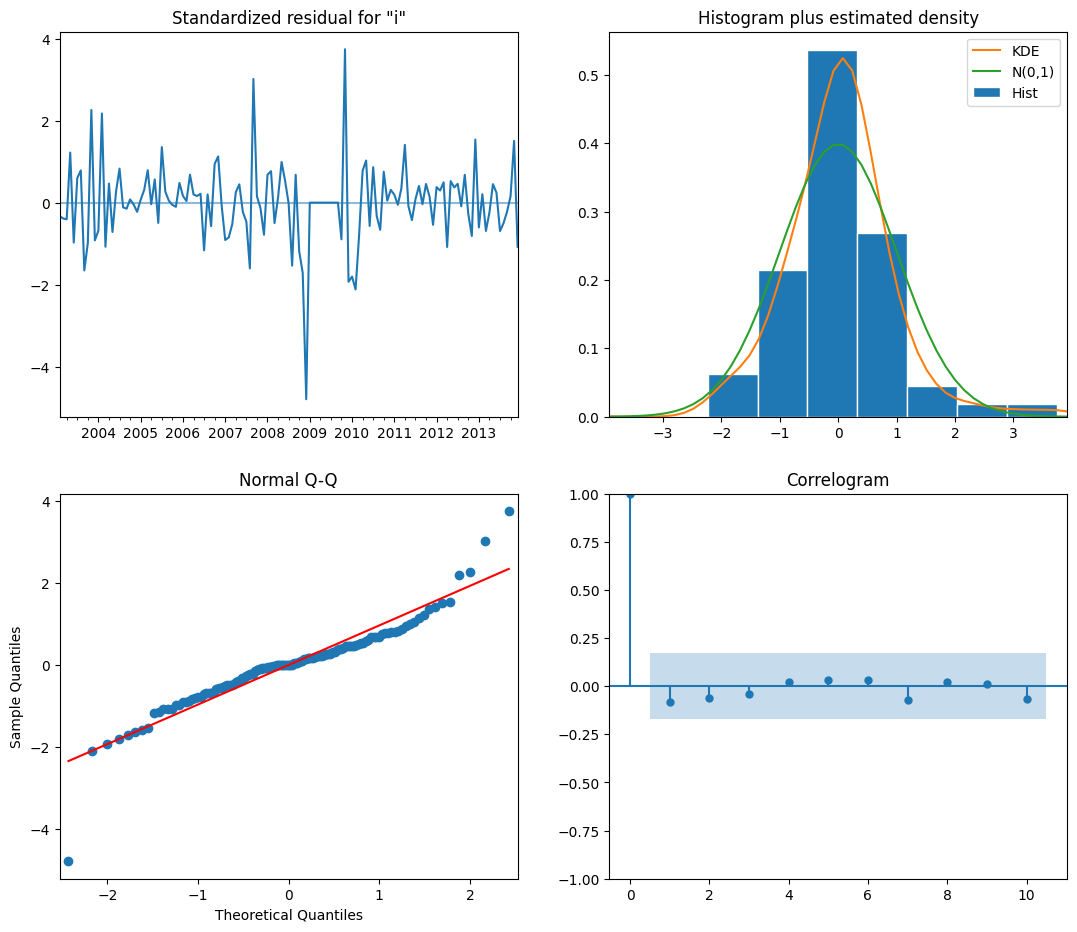

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


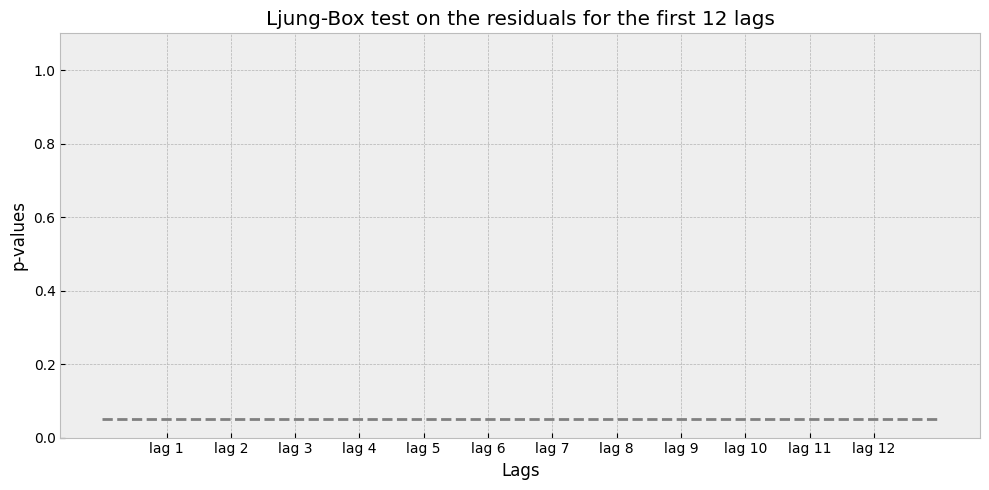

In [25]:
arima__model = sm.tsa.ARIMA(np.log(thailand.loc['2003-01-01':'2013-12-01']['inflation_yoy_pct']), order=(5,1,3))
arima_model_fit = arima__model.fit()
display(arima_model_fit.summary())
arima_model_fit.plot_diagnostics(figsize=(13,11))
arima_model_residuals = arima_model_fit.resid
tt.ljungbox(np.array(arima_model_residuals), lags=12)

In [ ]:
arima_post = arima_model_fit
predictions = []

for i in range(12):
    prediction = arima_post.forecast(1)
    predictions.append(list(prediction))
    arima_post = arima_post.append(prediction)    

In [26]:
arima_model_fit.forecast(12)

2014-01-01    0.589545
2014-02-01    0.637340
2014-03-01    0.687841
2014-04-01    0.711844
2014-05-01    0.787838
2014-06-01    0.829810
2014-07-01    0.844871
2014-08-01    0.889714
2014-09-01    0.920527
2014-10-01    0.913276
2014-11-01    0.925964
2014-12-01    0.940063
Freq: MS, Name: predicted_mean, dtype: float64

In [27]:
thai['prediction_arima'] = np.exp(arima_model_fit.forecast(12))

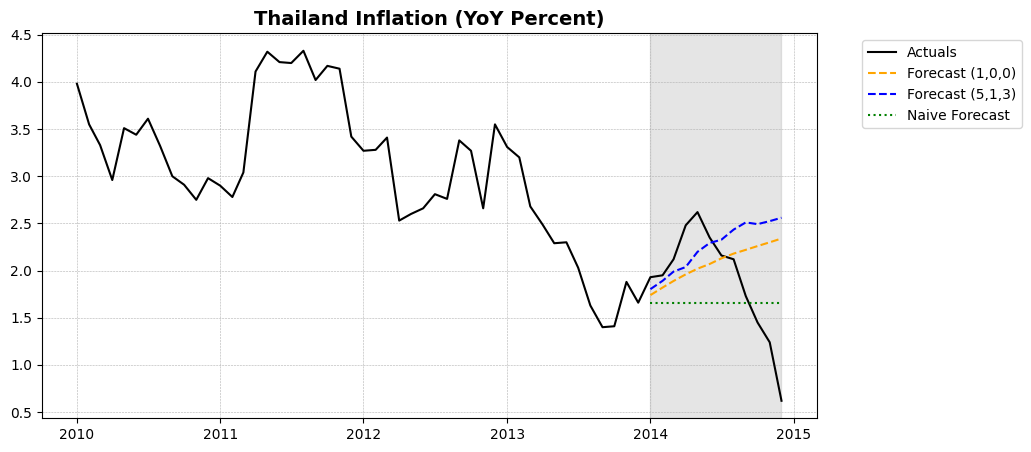

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(thailand.loc['2010':]['inflation_yoy_pct'], color='black', label='Actuals')
ax.plot(thai['prediction'], color='orange', label='Forecast (1,0,0)', ls='dashed')
ax.plot(thai['prediction_arima'], color='blue', label='Forecast (5,1,3)', ls='dashed')
ax.plot(thai['naive'], color='green', label='Naive Forecast', ls='dotted')
ax.axvspan(xmin='2014-01-01', xmax='2014-12-01', color='#808080', alpha=0.2)
ax.set_title('Thailand Inflation (YoY Percent)', size=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, ls='--', lw=0.4)
plt.show()

#### Session 4: Theil's U Statictics  

<img src='./figures/Theil U.png'></img><img src='./figures/Theil U1.png'></img>  
<img src='./figures/Theil U2.png'></img><img src='./figures/Theil U Principle.png'></img>
Welcome to Session 4 for Module 4 of Macroeconomic Forecasting course.
In this lecture, we're going to talk about Theil's U statistics.
So what are Theil's U statistics?
Originally, Theil introduced this statistics--
he introduced two statistics.
`U1 statistics`-- he interpreted as a measure of **forecast accuracy**.
And what it does-- it considers the disproportionate cost of large errors.
And this is the statistic that is reported by EViews.
However, it has undesirable properties that we're
going to mention in this lecture.
And you shouldn't use this statistic that much.
"Theil's `U2 statistic` is a measure of **forecast quality**," according to Theil.
And this statistic compares your forecast
with a benchmark or naive forecast.
But it doesn't have to be naive.
It can be any benchmark you want.
And this statistic is not reported by EViews.
So let's start with U1 statistics.
So what is U1 statistic?
**U1 statistic is just the root mean squared error normalized by the dispersion of actual and forecasted series.**
In the numerator here, you see the root mean squared error,
and this is dispersion of forecasted series.
And this is the dispersion of actual series.
**So it's kind of shown that U1 is always less than 1.  And you can see that it's always greater than 0, because U1 equal to 0 corresponds to best forecast-- no observation error.**
In this case, numerator of this fraction is
going to be 0 if all observational error are 0.
U1 statistic is generally smaller for a model that performs better.
**However, it doesn't have to be the case.  And because of this property, nobody uses Theil's U1 statistic anymore.**
However, U1 statistic is reported by EViews
and it's important to know that this statistic is a U1 statistic and not
U2 that we're going to talk about it on this slide.
So U2 statistic looks the following way.

On the numerator, you see that it's a root mean squared percentage error.
And in the numerator, you see the same root mean squared percentage error
but for naive forecast model.
**In a sense, what it is, it's just a ratio  of root means squared error for two different models.**
And whichever one is smaller has a better forecast performance, right?
In the original specification, U2 looks in this way.
So you can see easily that U2 is always going to be greater than 0.
And U2 equal to 0 if all forecasts errors are 0.
So in this case, numerator is going to be 0.
And U2 equals to 1 if we have a naive forecast.
In this case, numerator is the same as the denominator.

So U2 is smaller.
**Smaller U2 means better forecast model.**  
However, this statistic is not reported by EViews.
However, you can easily calculate it, if you're interested in it.
<code style="background:yellow;color:black">So generally speaking, U2 is a ratio of mean square errors as I mentioned earlier.</code>  However, you can compare mean squared error of the model
that you're interested in to any other method, not necessarily naive forecast.
And that's what often people do.
However, Theil compared it to a naive forecast,
and that's why I'm showing you this specification.

Again, so how does U2 statistic change when you
forecast more than one period ahead?
The only thing that changes is that you normalize your forecaster
in both case to the last variable observation.
So in this case, if we forecast several periods ahead,
the last known observation is going to-- suppose
it's the period t bar-- in this case, our forecast
according to naive forecast will be yt bar for the entire number
of periods over which we forecast.
That's why we have yt bar in the denominator here.
And again, the properties stay the same.
U2 equal to 0 if all forecast errors in the numerator are 0.
And U2 equals to 1 if we're dealing exactly with a naive forecast.
So how do we interpret this U statistic?
U2 equals 1 means that naive method is as good as the forecasting technique
that you evaluate.
If U2 is less than 1, that means the forecasting technique
is better than the naive method.
So that means that your model is good.
If U2 is bigger than 1, there's no point of using your formal forecasting
method, because naive method produces better forecast.
All right.
So let's switch to the second subtopic of this lecture, which
is decomposition of mean squared error.
You already know that from the previous lecture
that mean squared error is the sum of forecast error and the BIAS squared.
It can be shown that a standard forecast error squared
can be decomposed into this expression over here--
you can look at the appendix for that, where
sy is the standard deviation of actual series,
and r is the correlation coefficient between actual and the forecast series.
So what's the point of this decomposition?

So for example, when our mean squared error is high,
we can see where it's coming from.
Is it coming from the BIAS or is it coming
because we're not matching standard deviation of actual series
versus forecasted series very well?
So BIAS proportion is defined as the first term
divided by means squared error.
So you see that this is just the BIAS squared.
So it tells us how far the mean of the forecast
is from the mean of actual series.
So you want this number to be as small as possible.
And this is reported by EViews.
Variance proportion measures how far the variation of the [INAUDIBLE]
forecast from variation of the actual series.
And again, if your forecast is good, this number
should be as small as possible.
And this is also supported by EViews.
And covariance proportion measures the remaining unsystematic forecasting
error.
So you want this number to be as close to 1 as possible,
because biased proportion, plus variance proportion, plus covariance proportion
sum up to 1.
And again this number is a reported by EViews.
And so what properties it should satisfy is that the BIAS in variance proportion
should be small, and most of the mean squared error proportion
should be concentrated for covariance forecast.
So what we learned in this lecture is we learned about U1 and U2 statistics.
You shouldn't use U1 that often, but that's the one that EViews reports.
U2 has no undesirable properties, but you
need to program it in EViews if you want to use it.
And we also talked about decomposition of MSE
into three different proportions.
And we talked that if your forecast is good or most of your MSE
should be concentrated in the covariance proportion.
And generally speaking, instead of using U2,
you can use just a ratio of mean squared errors to achieve the same outcome.
All right, thank you.
This was Lecture 4, Module 4.
I'll see you in the workshop for this lecture.

# Rolling or expanding forecast strategy